Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [2]:
startup=pd.read_csv('50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Independent_variable(X)=('R&D Spend','Administration','Marketing Spend')
Dependent_variable(Y)='Profit'

# EDA

In [4]:
#Rename the columns
data=startup.rename({'R&D Spend':'RD','Administration':'Adm','Marketing Spend':'Msp'},axis=1)


In [5]:
data.head(2)

,RD,Adm,Msp,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   Adm     50 non-null     float64
 2   Msp     50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#checking for null values
data.isna().sum()

RD        0
Adm       0
Msp       0
State     0
Profit    0
dtype: int64

In [8]:
#checking duplicate values
data.duplicated().sum()

0

# correlation analysis

In [9]:
data.corr()

,RD,Adm,Msp,Profit
RD,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
Msp,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


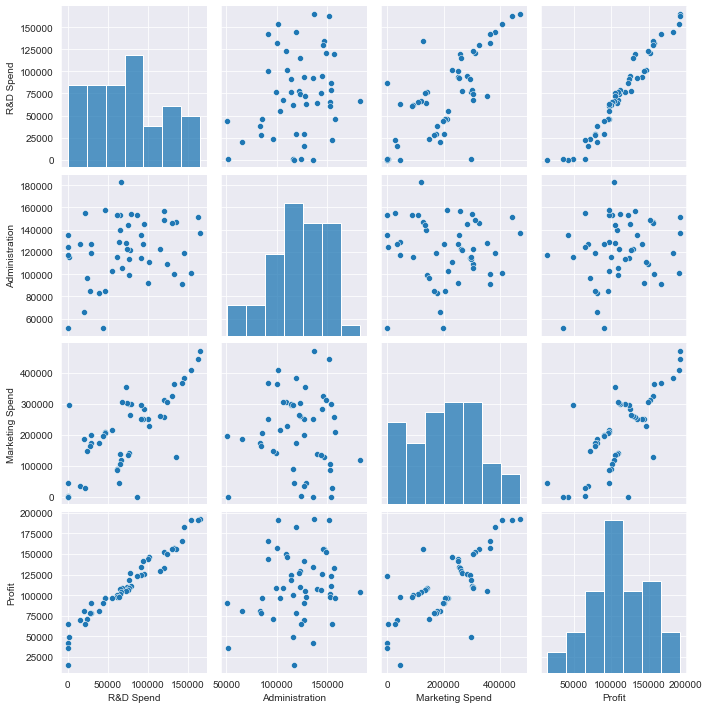

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)
plt.show()

# Model building

In [11]:
import statsmodels.formula.api as smf
data.columns

Index(['RD', 'Adm', 'Msp', 'State', 'Profit'], dtype='object')

In [12]:
model=smf.ols('Profit~RD+Adm+Msp',data=data).fit()

In [13]:
model.params

Intercept    50122.192990
RD               0.805715
Adm             -0.026816
Msp              0.027228
dtype: float64

In [14]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RD           17.846374
 Adm          -0.525507
 Msp           1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RD           2.634968e-22
 Adm          6.017551e-01
 Msp          1.047168e-01
 dtype: float64)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        10:33:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
Msp            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

#while : t-stat value less than 2 and the P-value is more than 0.05, 
then the variable is not significant.


#Build SLR & MLR model for 'Adm'  and  'msp'

# SLR

In [17]:
model_A=smf.ols('Profit~Adm',data=data).fit()
(model_A.tvalues,model_A.pvalues)
#p-value is insignificant for administration

(Intercept    3.040044
 Adm          1.419493
 dtype: float64,
 Intercept    0.003824
 Adm          0.162217
 dtype: float64)

In [18]:
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 22 Oct 2022   Prob (F-statistic):              0.162
Time:                        10:33:56   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Adm            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_m=smf.ols('Profit~Msp',data=data).fit()
(model_m.tvalues,model_m.pvalues)

(Intercept    7.808356
 Msp          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Msp          4.381073e-10
 dtype: float64)

In [20]:
model_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           4.38e-10
Time:                        10:33:56   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Msp            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#combine the two variables or features
model_a_m=smf.ols('Profit~Adm+Msp',data=data).fit()
(model_a_m.tvalues,model_a_m.pvalues)


(Intercept    1.142741
 Adm          2.467779
 Msp          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Adm          1.729198e-02
 Msp          9.727245e-11
 dtype: float64)

In [22]:
model_a_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           2.50e-10
Time:                        10:33:56   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Adm            0.3237      0.131      2.468      0.017       0.060       0.588
Msp            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

combine the two variables(Adm+Msp) it shows they are in non collinearity, 
their p-value also less than. so we include in the model

In [23]:
data.columns

Index(['RD', 'Adm', 'Msp', 'State', 'Profit'], dtype='object')

# Calculating VIF
collinearity check

In [24]:
rsq_RD=smf.ols('RD~Adm+Msp',data=data).fit().rsquared
vif_RD=1/(1-rsq_RD)
rsq_Adm=smf.ols('Adm~RD+Msp',data=data).fit().rsquared
vif_Adm=1/(1-rsq_Adm)
rsq_Msp=smf.ols('Msp~Adm+RD',data=data).fit().rsquared
vif_Msp=1/(1-rsq_Msp)

#putting in dataframe
df={'variables':['Rd','Adm','Msp'],'VIF':[vif_RD,vif_Adm,vif_Msp]}
vif_All=pd.DataFrame(df)
vif_All

,variables,VIF
0,Rd,2.468903
1,Adm,1.175091
2,Msp,2.326773


In [25]:
#since VIF values are less than 20 there is no collinearity , so use all features in the Regression.

In [26]:
#Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'Normal Q-Q plot')

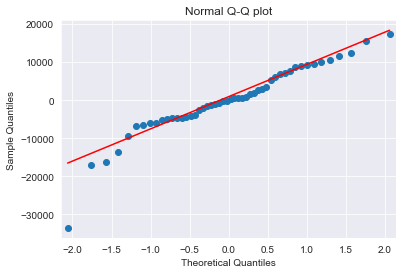

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')


# Homoscedasticity
checking for same variance

In [28]:
def standval(val): return(val-val.mean())/val.std() #z=x-mu/sigma

Text(0, 0.5, 'Residual values')

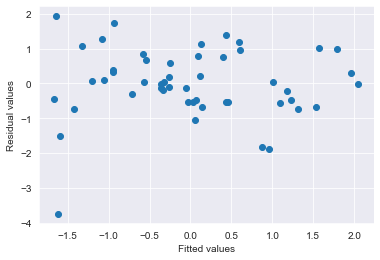

In [29]:
plt.scatter(standval(model.fittedvalues),standval(model.resid))
plt.xlabel('Fitted values')
plt.ylabel('Residual values')

# Residual (errors) vs Regressors (x-inde)

In [30]:
data.columns

Index(['RD', 'Adm', 'Msp', 'State', 'Profit'], dtype='object')

eval_env: 1


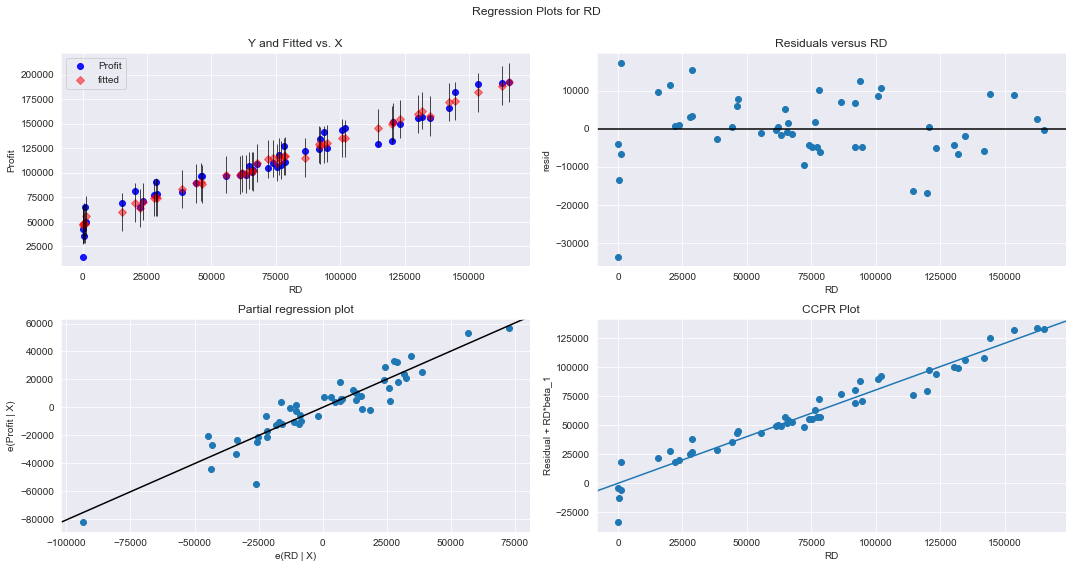

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)

eval_env: 1


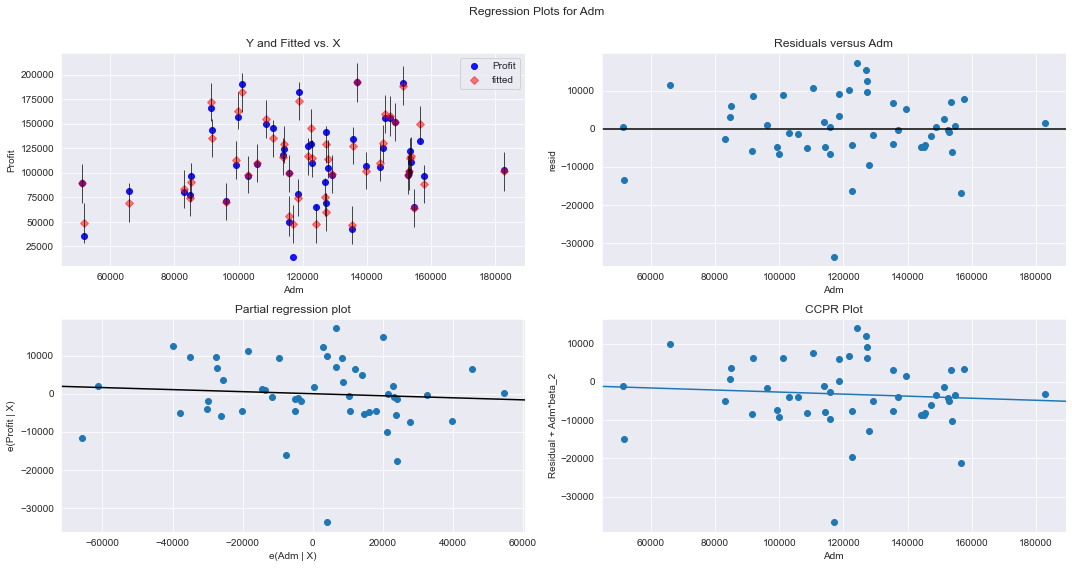

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Adm',fig=fig)

eval_env: 1


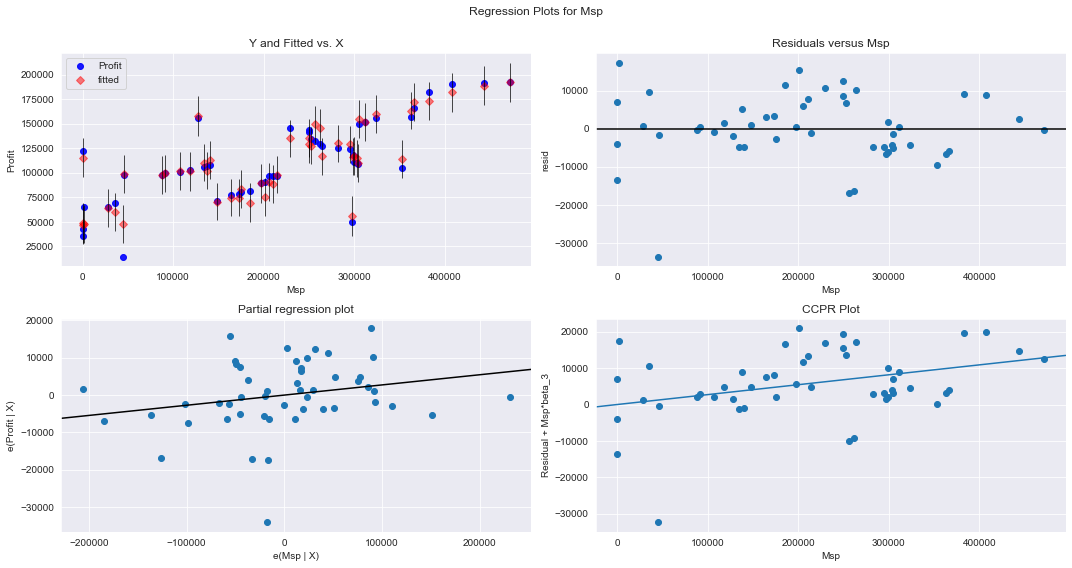

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Msp',fig=fig)

# cooks's distance

In [35]:
(c,_)=model.get_influence().cooks_distance

<StemContainer object of 3 artists>

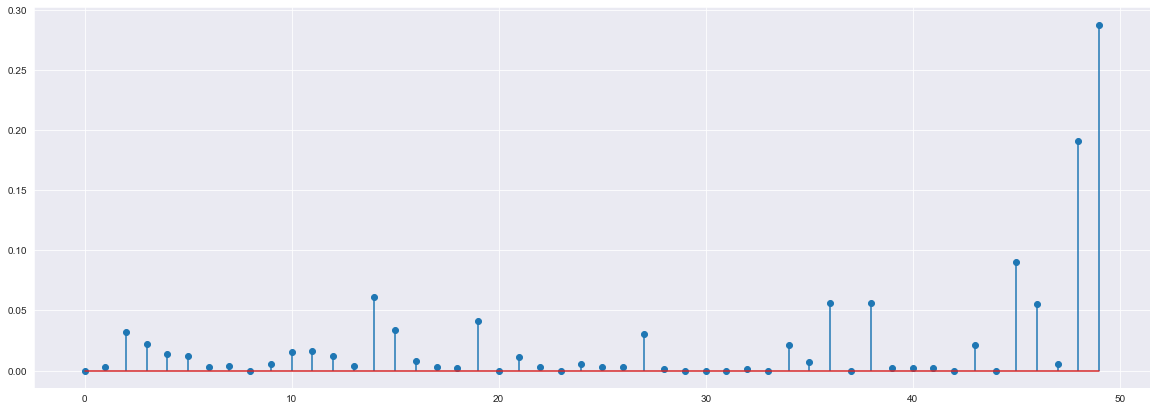

In [36]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))

In [36]:
#index and value of influencers ,where c>0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

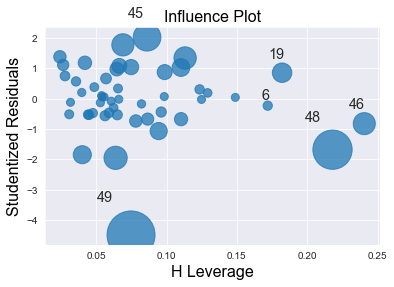

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [39]:
#Leverage cutoff
data.shape

(50, 5)

In [40]:
k=data.shape[1]
n=data.shape[0]
Leverage_cutoff=3*((k+1)/n)
Leverage_cutoff

0.36

In [41]:
#From the above plot data point 49 is a influencer
data[data.index.isin([49])]

,RD,Adm,Msp,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# improving the model

In [44]:
data1=data.drop(data.index[[49]],axis=0).reset_index()

In [45]:
data2=data1.drop(['index'],axis=1)

In [66]:
data2.shape

(49, 5)

#  Again build model

In [49]:
final_model=smf.ols('Profit~RD+Adm+Msp',data=data2).fit()

In [51]:
final_model.rsquared,final_model.aic

(0.9613162435129847, 1020.5652974526367)

In [52]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           8.85e-32
Time:                        10:41:45   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
Adm           -0.0222      0.043     -0.518      0.607      -0.109       0.064
Msp            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<StemContainer object of 3 artists>

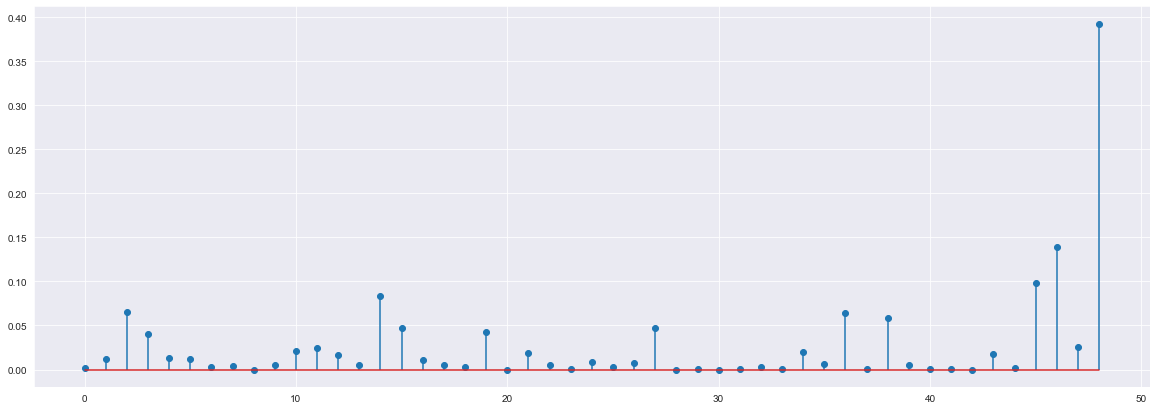

In [54]:
#again cooks distance
(c1,_)=final_model.get_influence().cooks_distance
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c1,3))

In [55]:
(np.argmax(c1),np.max(c1))

(48, 0.39274420556321527)

In [56]:
data3=data2.drop(data2.index[[48]],axis=0).reset_index()

In [57]:
data4=data3.drop(['index'],axis=1)

In [65]:
data4.shape

(48, 5)

In [59]:
final_model_2=smf.ols('Profit~RD+Adm+Msp',data=data4).fit()

In [61]:
final_model_2.rsquared

0.9626766170294073

In [60]:
final_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           2.03e-31
Time:                        10:50:00   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
Adm           -0.0633      0.044     -1.442      0.156      -0.152       0.025
Msp            0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Final_model_2 --  is the final model..
where r-squared value near to 1 , we can stop the  diagnostic process and finalize the model


# R^2 value for each final model


In [63]:
d={'Prep_model':['Model1','Model_final'],"R_squared":[final_model.rsquared,final_model_2.rsquared]}

In [64]:
table=pd.DataFrame(d)
table

,Prep_model,R_squared
0,Model1,0.961316
1,Model_final,0.962677
